<p style="font-family:Times New Roman; font-size:27px;font-weight:bold; color:darkred;">
📘 Social Media Engagement Analysis</p>
<p style="font-family:Times New Roman; font-size:24px;font-weight:bold; color:darkred;">
    (Final Bootcamp Project – EDA & Business Insights)
</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
📌 Project Motivation
</p>
<p style="font-family:Times New Roman; font-size:18px">
Social media platforms are a key marketing channel for consumer brands in Europe.
However, digital marketing teams often struggle to understand what content works best, when to post, and which audience segments drive higher engagement.
<br>
<br>
This project aims to analyze social media engagement data to extract actionable insights that can help marketing teams <br>optimize their content strategy.
<br>
<br>
<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
🎯 Project Objectives
</p>
<ul style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
 <li>Understand engagement patterns across platforms and content types</li>
 <li>Identify high-performing posting times</li>
 <li>Analyze audience characteristics linked to higher engagement</li>
 <li>Provide data-driven recommendations for content planning</li>
 </ul>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Data import 
df = pd.read_csv("data.csv")

# View the data
df.head()


,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Audience Gender,Audience Location,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255,415,77,85,2619,1842,31.32,29,Other,United Kingdom,respond,NaN,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,908,125,85,1223,3884,28.78,48,Male,Greece,population,NaN,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.212,412,419,58,2165,849,104.71,55,Male,United States Virgin Islands,himself,NaN,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.228,667,153,29,7191,3519,24.13,54,Other,Zambia,safe,NaN,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425,659,215,34,3312,2032,44.69,33,Other,Afghanistan,well,6052b8d2-3403-4447-b0b4-c5ce20e6c8d0,NaN,NaN


In [3]:
# Basic information, Exploring my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Platform            100000 non-null  object        
 1   Post ID             100000 non-null  object        
 2   Post Type           100000 non-null  object        
 3   Post Content        100000 non-null  object        
 4   Post Timestamp      100000 non-null  datetime64[ns]
 5   Likes               100000 non-null  int64         
 6   Comments            100000 non-null  int64         
 7   Shares              100000 non-null  int64         
 8   Impressions         100000 non-null  int64         
 9   Reach               100000 non-null  int64         
 10  Engagement Rate     100000 non-null  float64       
 11  Audience Age        100000 non-null  int64         
 12  Audience Gender     100000 non-null  object        
 13  Audience Location   100000 non

In [4]:
# Describe the data - Descriptive statistics.
df.describe()

,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2022-09-09 03:59:54.133811456,499.396240,249.699200,100.118510,5487.629060,2751.519980,43.411362,41.514740
min,2021-03-08 19:13:37.453000,0.000000,0.000000,0.000000,1000.000000,500.000000,0.490000,18.000000
25%,2021-12-08 15:02:33.308499968,249.000000,124.000000,50.000000,3239.000000,1627.000000,20.030000,30.000000
50%,2022-09-09 14:43:13.861499904,500.000000,250.000000,100.000000,5477.000000,2754.000000,30.770000,42.000000
75%,2023-06-11 07:30:04.048250112,750.000000,375.000000,150.000000,7733.000000,3877.250000,52.372500,54.000000
max,2024-03-08 11:33:25.534000,1000.000000,500.000000,200.000000,10000.000000,5000.000000,312.550000,65.000000
std,NaN,289.097792,144.611199,57.924815,2594.674198,1299.359706,37.746432,13.867187


In [5]:
# Dataset Shape
df.shape

(100000, 18)


<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
Initial Observations, Data Quality Check & Feature Engineering
</p>

<ul style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
  <li>The dataset contains engagement metrics such as likes, shares, comments.</li>
  <li>Includes audience demographics and posting time.</li>
  <li>Engagement-related features will be used to create a combined engagement metric.</li>
  <li>Time-based features (day of week, hour) will be extracted from timestamps.</li>
</ul>

In [6]:
# Numbers of unique values in each columns
df.nunique()

Platform                   4
Post ID               100000
Post Type                  3
Post Content          100000
Post Timestamp        100000
Likes                   1001
Comments                 501
Shares                   201
Impressions             9001
Reach                   4501
Engagement Rate        15106
Audience Age              48
Audience Gender            3
Audience Location        243
Audience Interests       971
Campaign ID            20132
Sentiment                  3
Influencer ID           9994
dtype: int64

In [7]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Influencer ID         90006
Campaign ID           79868
Sentiment             50100
Platform                  0
Post ID                   0
Post Type                 0
Comments                  0
Post Content              0
Post Timestamp            0
Likes                     0
Reach                     0
Impressions               0
Shares                    0
Engagement Rate           0
Audience Location         0
Audience Gender           0
Audience Age              0
Audience Interests        0
dtype: int64

In [8]:
# Handling missing values
df["Influencer ID"] = df["Influencer ID"].fillna("No Influencer")
df["Campaign ID"] = df["Campaign ID"].fillna("Organic")
df["Sentiment"] = df["Sentiment"].fillna("Unknown")

In [9]:
# Find the duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Feature Engineering - Creating a new feature 'total_engagement'
df["Total_Engagement"] = (
    df["Likes"] +
    df["Comments"] +
    df["Shares"]
)


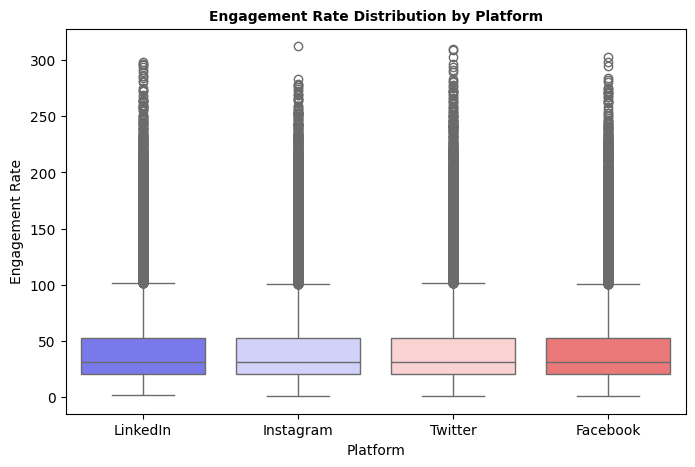

In [17]:
# Engagement Rate Distribution by Platform with Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Platform",
    y="Engagement Rate",
    palette="bwr"
)
plt.title("Engagement Rate Distribution by Platform",fontsize=10, fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features and Engagement Metrics')

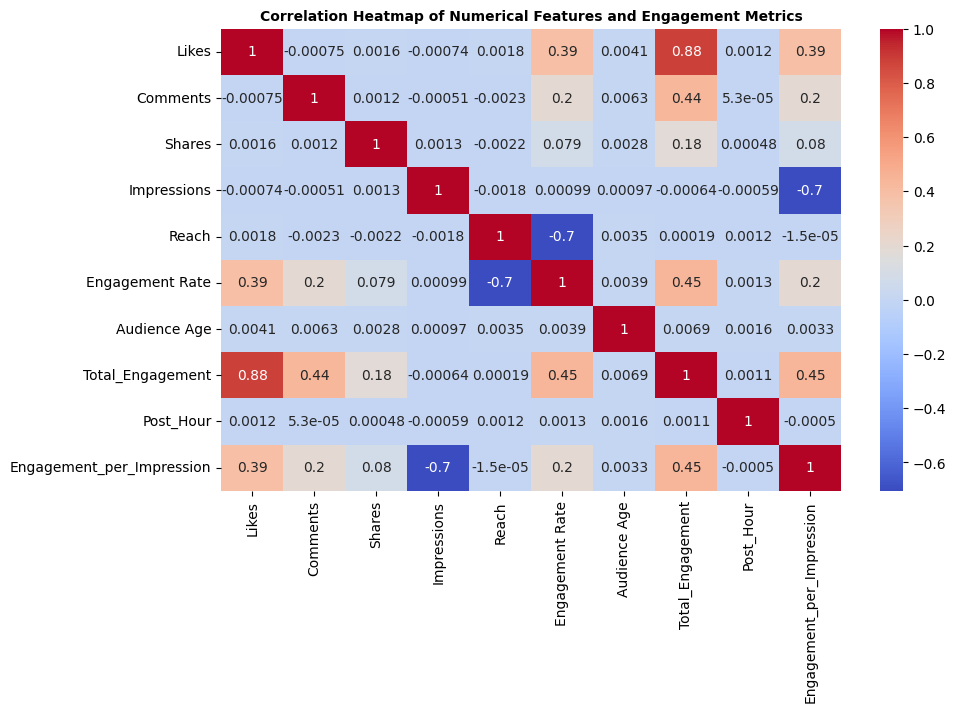

In [19]:
# Correlation Heatmap of Numerical Features and Engagement Metrics
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features and Engagement Metrics',fontsize=10, fontweight="bold")

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
From Data to Business Questions
</p>

<p style="font-family:Times New Roman; font-size:18px;">
After preparing the data, the next step is to align the analysis with stakeholder needs.<br>
Based on the responsibilities of the digital marketing team, we define key business questions
and formulate hypotheses <br> to guide the exploratory analysis.</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
Business Context and Stakeholder Overview </p>
<p style="font-family:Times New Roman; font-size:18px;">
The primary stakeholder for this project is a digital marketing team of a mid-sized consumer brand operating in Europe.
<br>
<br>
This team is responsible for:<br>
<ul style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
 <li>Planning and managing social media campaigns</li>
 <li>Monitoring content performance across platforms</li>
 <li>Maximizing user engagement with limited resources</li>
 </ul></p>
<p style="font-family:Times New Roman; font-size:18px;">

<p style="font-family:Times New Roman; font-size:18px;font-weight:bold; color:darkred;">Stakeholder Needs:</p>
<ul style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
 <li>Identify which content types and posting strategies generate the most engagement </li>
 <li>Understand audience segments for targeted campaigns</li>
 <li>Optimize posting time and platform selection </li>
 <li>Evaluate the effectiveness of campaigns and improve ROI </li>
 </ul></p>

<p style="font-family:Times New Roman; font-size:18px;font-weight:bold; color:darkred;">Project Relevance:</p>
<p style="font-family:Times New Roman; font-size:18px">
The insights derived from social media engagement data will help the team make data-driven decisions to: </p>
<ul style="font-family:Times New Roman; font-size:18px; list-style-type:square;">

 <li>Increase overall engagement </li>
 <li>Improve content strategy</li>
 <li>Allocate resources efficiently to high-impact posts </li>
</ul></p>



<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Business Questions and Hypotheses </p>

<p style="font-family:Times New Roman; font-size:18px;">
Based on the stakeholder’s objectives, the following business questions and hypotheses are defined.
<br>
<br>
<strong>BQ1</strong>: How do different social media platforms perform in terms of engagement rate and audience reach? (Platform Performance)
<br>
<br>
<strong>BQ2</strong>: Which audience segments (Age Group, Gender, Location) interact most with content and how does engagement vary across segments? (Audience Targeting)
<br>
<br>
<strong>BQ3</strong>: Which posting time periods yield higher engagement rates? (Time Optimization)
<br>
<br>
To address these questions, the following hypotheses are tested:
<br>
<br>
<strong>Hypothesis 1</strong>: Instagram and TikTok posts achieve higher engagement rates than other platforms.
<br>
<br>
<strong>Hypothesis 2</strong>: Younger audiences (18-34) show higher engagement, and specific audience locations have stronger interaction.
<br>
<br>
<strong>Hypothesis 3</strong>: Posts published during peak time periods (evening hours) achieve higher engagement rates than posts at other times.</p>
   


<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Analysis of Hypothesis 1 </p>

<p style="font-family:Times New Roman; font-size:18px;">
Instagram and TikTok posts achieve higher engagement rates than other platforms.